In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:/kifiya ai/Solar-radiation-measurement/src/sierraleone-bumbuna.csv"  
data = pd.read_csv(file_path)


In [2]:
# 1. Summary Statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

In [3]:
# 2. Data Quality Check
print("\nChecking for missing values:")
print(data.isnull().sum())

print("\nChecking for negative values in GHI, DNI, and DHI:")
negative_values = data[(data['GHI'] < 0) | (data['DNI'] < 0) | (data['DHI'] < 0)]
print(negative_values)



Checking for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Checking for negative values in GHI, DNI, and DHI:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0

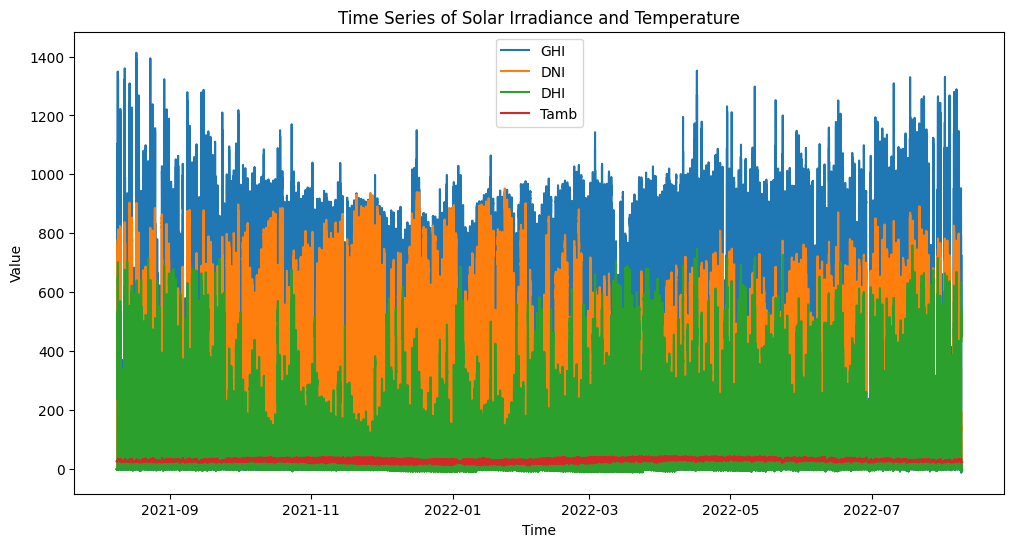

In [4]:

# 3. Time Series Analysis
# Convert the 'Timestamp' column to a datetime object
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# Plotting GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(12, 6))
for column in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(data['Timestamp'], data[column], label=column)
plt.legend()
plt.title("Time Series of Solar Irradiance and Temperature")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

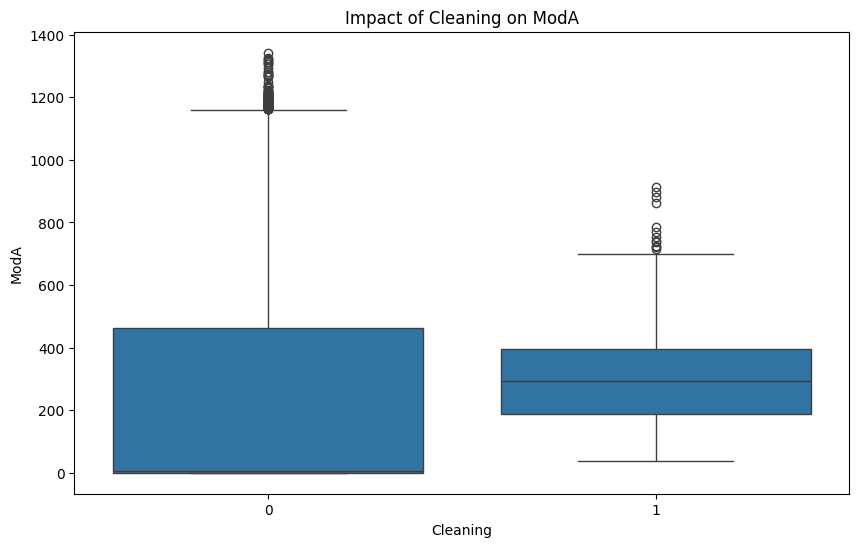

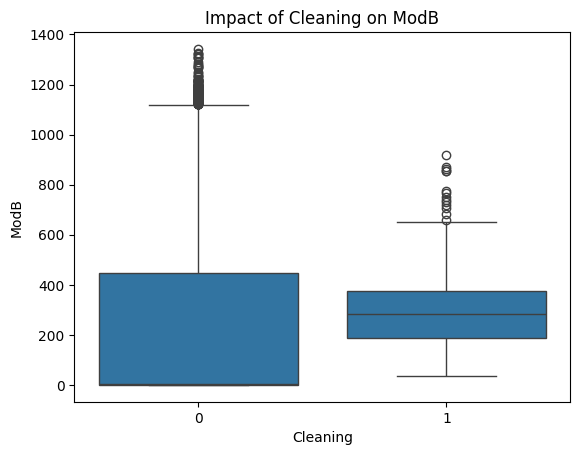

In [5]:
# 4. Impact of Cleaning on Sensor Readings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cleaning', y='ModA', data=data)
plt.title("Impact of Cleaning on ModA")
plt.show()

sns.boxplot(x='Cleaning', y='ModB', data=data)
plt.title("Impact of Cleaning on ModB")
plt.show()

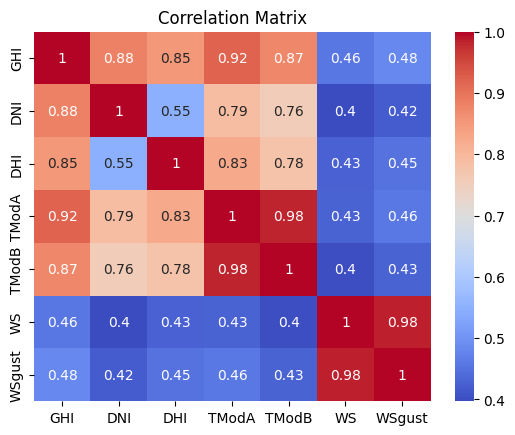

In [6]:
# 5. Correlation Analysis
correlation_matrix = data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<Figure size 800x800 with 0 Axes>

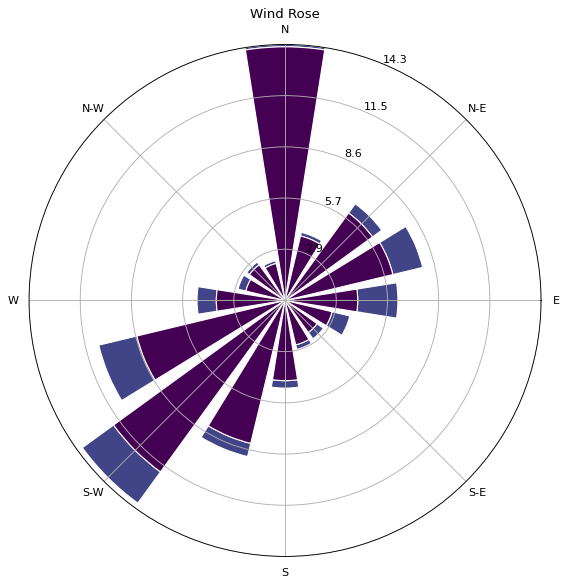

In [7]:
# 6. Wind Analysis (Wind Roses)
from windrose import WindroseAxes

plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(data['WD'], data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title("Wind Rose")
plt.show()


c:\kifiya ai\Solar-radiation-measurement\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


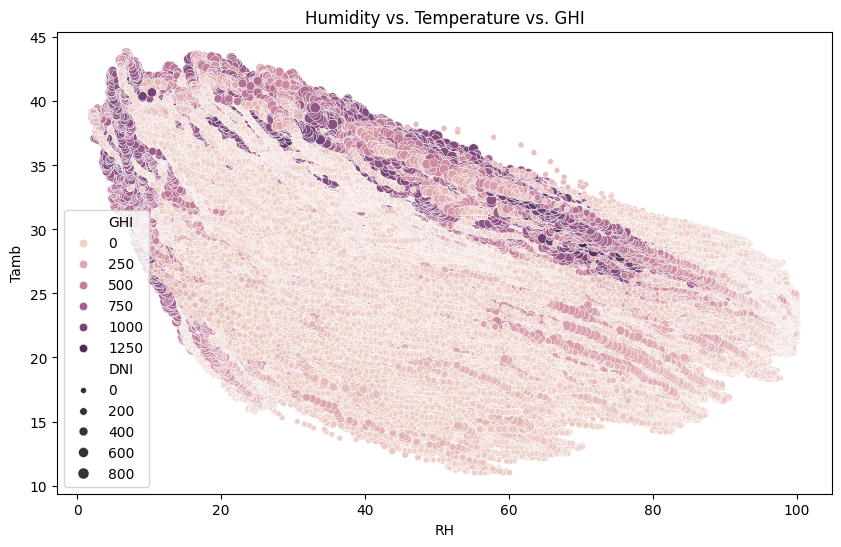

In [8]:
# 7. Temperature Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RH', y='Tamb', hue='GHI', size='DNI', data=data)
plt.title("Humidity vs. Temperature vs. GHI")
plt.show()

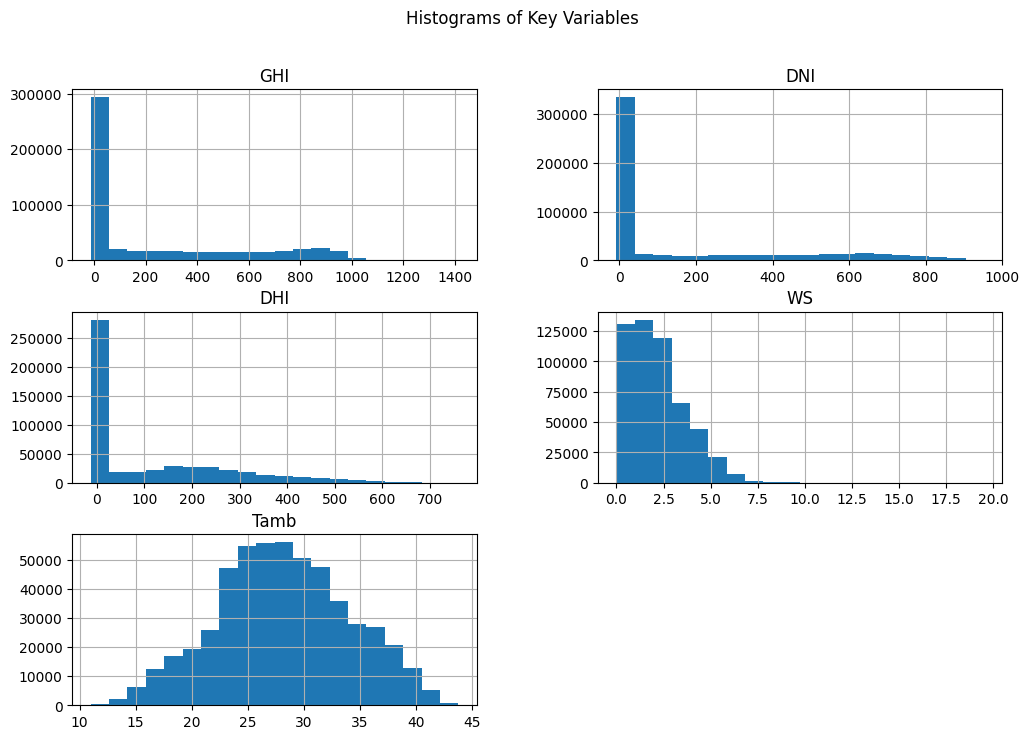

In [9]:
# 8. Histograms
columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
data[columns_to_plot].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Key Variables")
plt.show()


In [10]:
# 9. Z-Score Analysis
from scipy.stats import zscore

z_scores = data[['GHI', 'DNI', 'DHI', 'Tamb', 'WS']].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print("\nOutliers Detected:")
print(data[outliers])


Outliers Detected:
                 Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670    2021-08-09 11:11:00   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671    2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672    2021-08-09 11:13:00   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673    2021-08-09 11:14:00   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674    2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
525105 2022-08-08 15:46:00     8.7   -0.2    8.6     9.0     8.8  21.7  98.7   
525107 2022-08-08 15:48:00     8.4   -0.1    8.3     8.8     8.6  21.7  98.7   
525119 2022-08-08 16:00:00     7.9    0.0    7.8     8.3     8.2  21.9  99.0   
525141 2022-08-08 16:22:00     4.6   -0.1    4.6     6.1     5.9  21.9  99.0   
525151 2022-08-08 16:32:00     4.7   -0.1    4.8     6.0     5.9  22.0  99.1   

         WS  WSgust

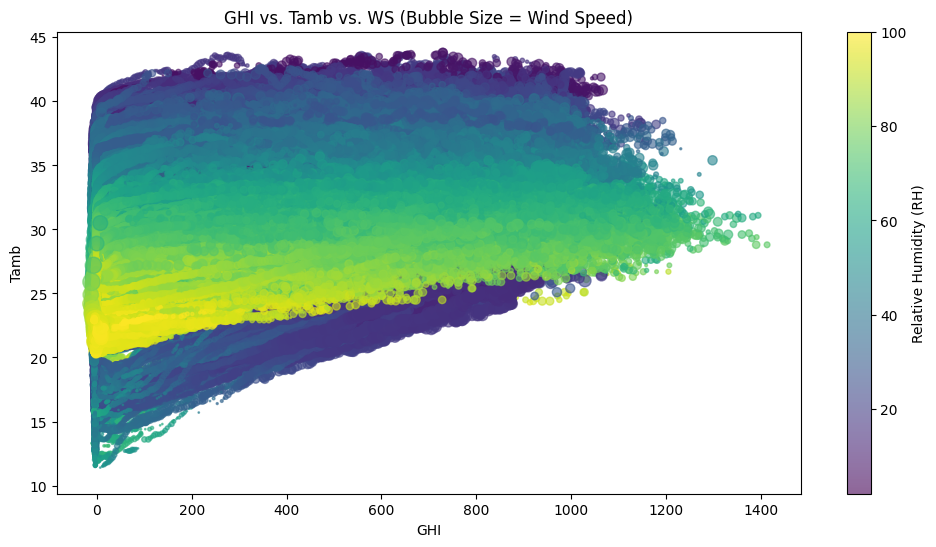

In [11]:

# 10. Bubble Chart
plt.figure(figsize=(12, 6))
bubble_chart = plt.scatter(data['GHI'], data['Tamb'], s=data['WS']*10, c=data['RH'], cmap='viridis', alpha=0.6)
plt.colorbar(bubble_chart, label='Relative Humidity (RH)')
plt.title("GHI vs. Tamb vs. WS (Bubble Size = Wind Speed)")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.show()

In [13]:
# 11. Data Cleaning
# Dropping rows with null timestamps
data_cleaned = data.dropna(subset=['Timestamp'])

# Handling missing or negative values
data_cleaned = data_cleaned[(data_cleaned['GHI'] >= 0) & (data_cleaned['DNI'] >= 0) & (data_cleaned['DHI'] >= 0)]

# Dropping unused or null-filled columns
data_cleaned = data_cleaned.drop(columns=['Comments'])

print("\nCleaned Data Summary:")
print(data_cleaned.info())

data_cleaned.to_csv("../src/data/cleaned_data/cleaned_data_for_serralenone_analysis.csv", index=False)


Cleaned Data Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 246878 entries, 413 to 525170
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      246878 non-null  datetime64[ns]
 1   GHI            246878 non-null  float64       
 2   DNI            246878 non-null  float64       
 3   DHI            246878 non-null  float64       
 4   ModA           246878 non-null  float64       
 5   ModB           246878 non-null  float64       
 6   Tamb           246878 non-null  float64       
 7   RH             246878 non-null  float64       
 8   WS             246878 non-null  float64       
 9   WSgust         246878 non-null  float64       
 10  WSstdev        246878 non-null  float64       
 11  WD             246878 non-null  float64       
 12  WDstdev        246878 non-null  float64       
 13  BP             246878 non-null  int64         
 14  Cleaning       246878 non-null  